In [2]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dset_str = 'train'
dir_data = os.path.expanduser('~/scratch')
dir_dataset = os.path.join(dir_data, 'files_small')
toy_train_pa = torch.load(os.path.join(dir_dataset, 'toy_train_pa.pt')).numpy()
toy_train_lat = torch.load(os.path.join(dir_dataset, 'toy_train_lat.pt')).numpy()

(70, 128, 128)


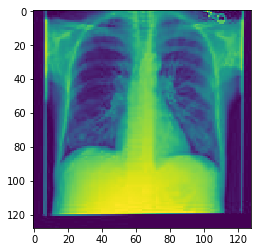

In [4]:
print(toy_train_pa.shape)
plt.imshow(toy_train_pa[0])
plt.show()

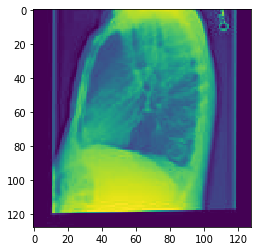

In [4]:
plt.imshow(toy_train_lat[0])
plt.show()


In [11]:
str_labels = ['Lung Opacity', 'Pleural Effusion', 'Support Devices']

train_labels = pd.read_csv(os.path.join(dir_dataset, 'train_labels.csv'))[str_labels].fillna(0)
train_labels.head()

,Lung Opacity,Pleural Effusion,Support Devices
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


The labels have 3 classes. Since we use linear classifiers for the evaluation, we remove the 3rd class "unsure" with label -1.
We need to filter out all values where the label is -1 in the dataset.

In [12]:
print(np.unique(train_labels[str_labels].values.ravel(), return_counts=True))
indices = []
indices += train_labels.index[(train_labels['Lung Opacity'] == -1)].tolist()
indices += train_labels.index[(train_labels['Pleural Effusion'] == -1)].tolist()
indices += train_labels.index[(train_labels['Support Devices'] == -1)].tolist()
indices = list(set(indices))
print(train_labels.iloc[indices].head())

(array([-1.,  0.,  1.]), array([  1317, 172334,  11590]))
       Lung Opacity  Pleural Effusion  Support Devices
34816          -1.0               0.0              0.0
41518           0.0              -1.0              1.0
12292          -1.0               1.0              0.0
24581          -1.0               1.0              0.0
2053            1.0              -1.0              0.0


In [13]:
print(len(train_labels), len(indices))
new_train_labels= train_labels.drop(indices)
new_train_labels.head()
print(len(new_train_labels))

61747 1286
60461


Some of the latent representations are always nans during the basic routine epoch

In [43]:
table = pd.read_csv(os.path.expanduser('~/Documents/master3/leomed_scratch/bugs/basic_routine_epoch.csv'))
for run, subtable in table.groupby('run'):
    print(len(subtable))
    print(pd.DataFrame(subtable.isna().mean().round(4) * 100, columns=['percentage_of_nans']))
    print('\n')

1659
                     percentage_of_nans
Lateral0_mean                     96.20
Lateral1_mean                     96.20
Lateral_style0_mean              100.00
Lateral_style1_mean              100.00
PA0_mean                          96.20
PA1_mean                          96.20
PA_style0_mean                   100.00
PA_style1_mean                   100.00
run                                0.00
text0_mean                        96.26
text1_mean                        96.26
text_style0_mean                 100.00
text_style1_mean                 100.00


295
                     percentage_of_nans
Lateral0_mean                       0.0
Lateral1_mean                       0.0
Lateral_style0_mean               100.0
Lateral_style1_mean               100.0
PA0_mean                            0.0
PA1_mean                            0.0
PA_style0_mean                    100.0
PA_style1_mean                    100.0
run                                 0.0
text0_mean                   